# Energy Consumption Analysis Report
By Tushar Teotia

Date: 15 Jan

## Introduction
This report analyzes energy consumption patterns across different building types using machine learning techniques. The dataset contains information about building characteristics, occupancy, and energy usage.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import kagglehub


sns.set_theme(style="whitegrid", palette="husl")
path = kagglehub.dataset_download("govindaramsriram/energy-consumption-dataset-linear-regression")

print("Path to dataset files:", path)
data_dir = "/Users/tusharteotia/.cache/kagglehub/datasets/govindaramsriram/energy-consumption-dataset-linear-regression/versions/1"

print("Files in directory:", os.listdir(data_dir))

Path to dataset files: /Users/tusharteotia/.cache/kagglehub/datasets/govindaramsriram/energy-consumption-dataset-linear-regression/versions/1
Files in directory: ['test_energy_data.csv', 'train_energy_data.csv']


In [14]:
train_path = os.path.join(data_dir, 'train_energy_data.csv')
test_path = os.path.join(data_dir, 'test_energy_data.csv')
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)


print("Training Dataset Info:")
print(train_df.info())
print("\nTest Dataset Info:")
print(test_df.info())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB
None

Test Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 n

## Data Cleaning and Preprocessing
Let's check for missing values and duplicates in our datasets.

In [15]:
print("Missing values in training set:")
print(train_df.isnull().sum())
print("\nMissing values in test set:")
print(test_df.isnull().sum())


train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

Missing values in training set:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

Missing values in test set:
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


## Exploratory Data Analysis
### 1. Distribution of Categorical Variables

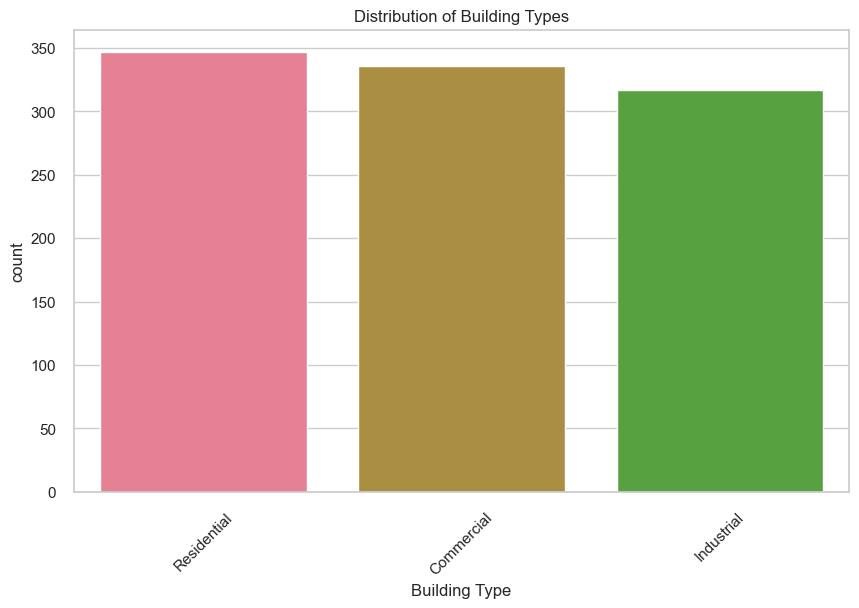

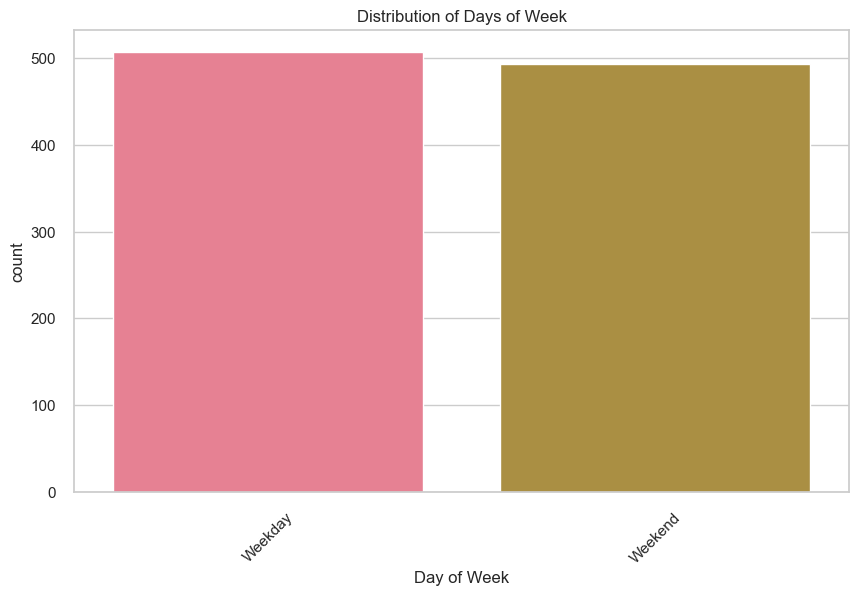

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Building Type')
plt.title('Distribution of Building Types')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Day of Week')
plt.title('Distribution of Days of Week')
plt.xticks(rotation=45)
plt.show()

### 2. Analysis of Numerical Variables

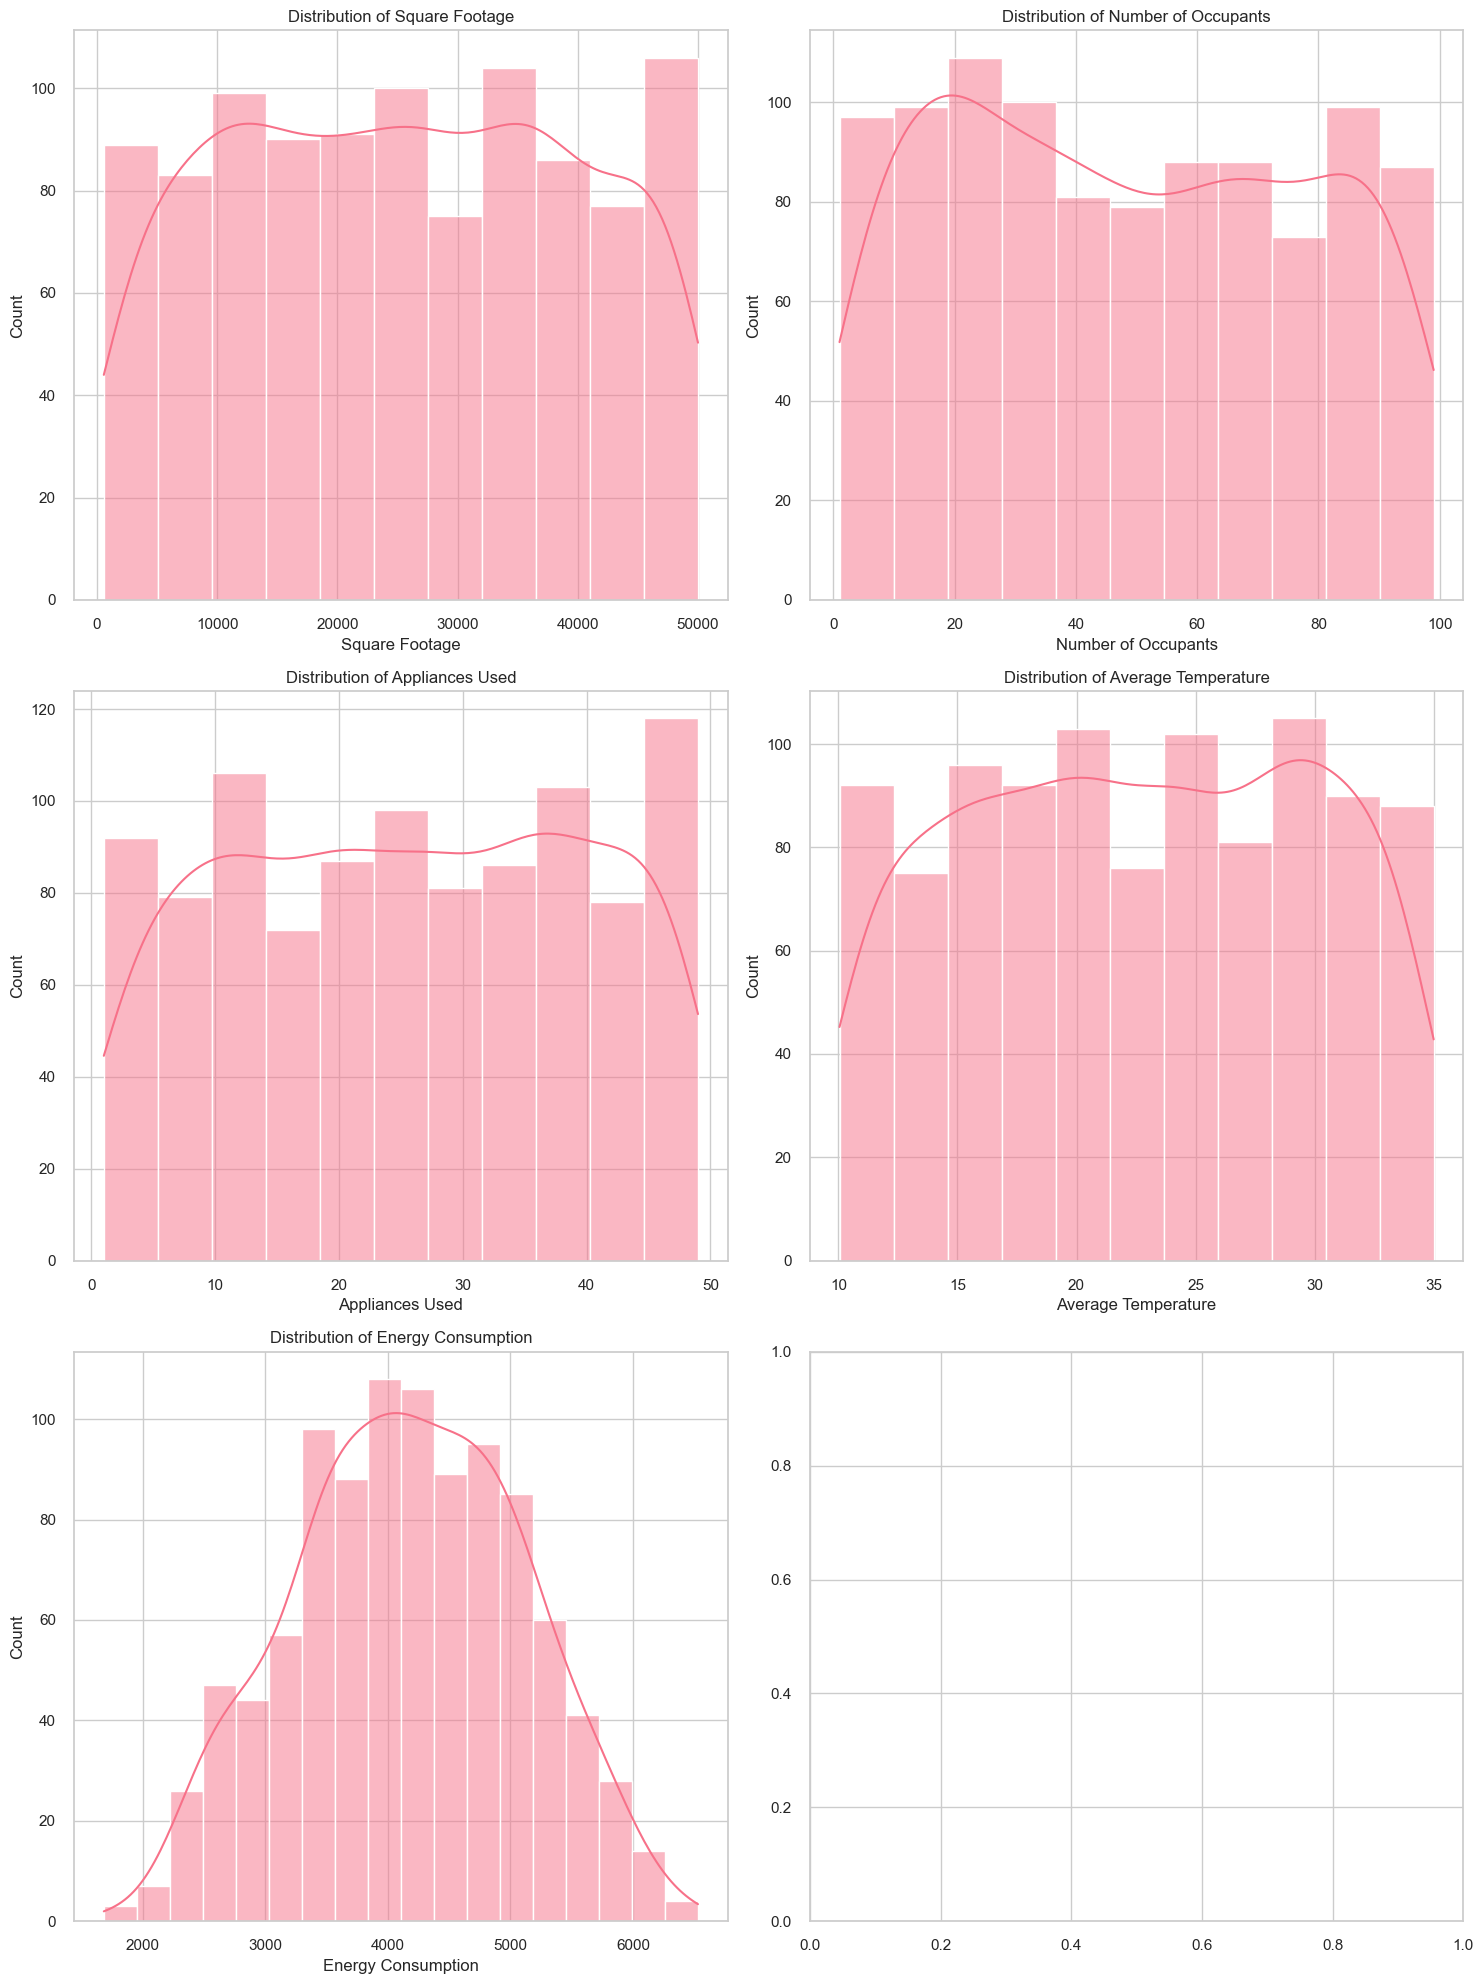


Numerical Variables Summary Statistics:
       Square Footage  Number of Occupants  Appliances Used  \
count        1000.000          1000.000000      1000.000000   
mean        25462.388            48.372000        25.606000   
std         14294.554            29.061972        14.105166   
min           560.000             1.000000         1.000000   
25%         13169.750            22.000000        13.000000   
50%         25477.000            47.000000        26.000000   
75%         37446.250            73.250000        38.000000   
max         49997.000            99.000000        49.000000   

       Average Temperature  Energy Consumption  
count          1000.000000         1000.000000  
mean             22.611390         4166.252570  
std               7.139943          933.313064  
min              10.050000         1683.950000  
25%              16.475000         3509.482500  
50%              22.815000         4175.730000  
75%              28.850000         4863.850000  

In [26]:
numerical_cols = ['Square Footage', 'Number of Occupants', 'Appliances Used', 
                 'Average Temperature', 'Energy Consumption']

fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if col in train_df.columns:
        sns.histplot(data=train_df, x=col, kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

print("\nNumerical Variables Summary Statistics:")
print(train_df[numerical_cols].describe())

### 3. Correlation Analysis

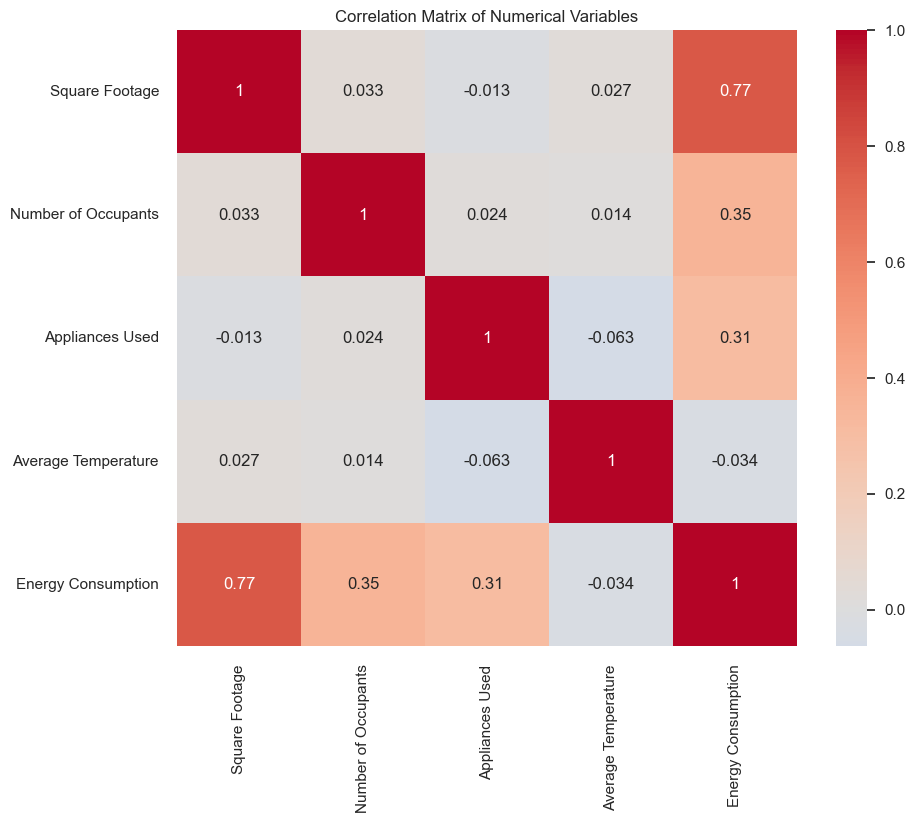

In [37]:
correlation = train_df.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### 4. Energy Consumption Patterns

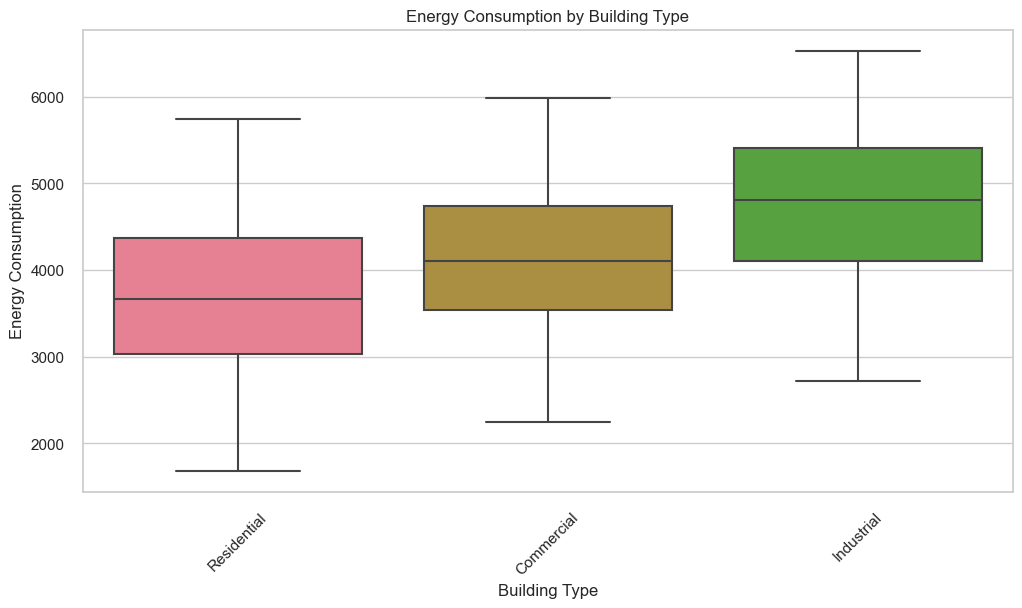

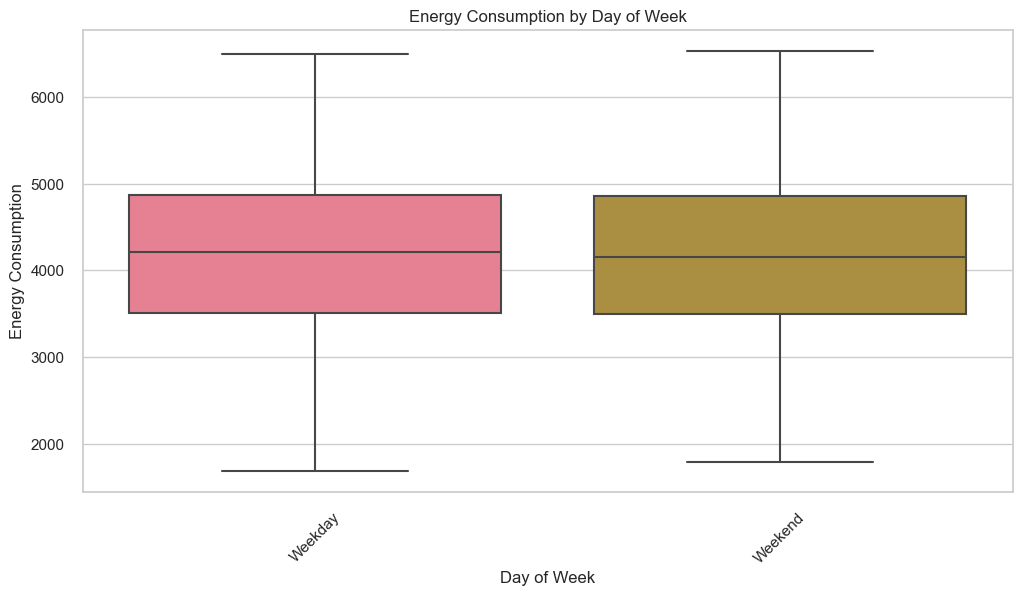


Energy Consumption by Building Type:
                      mean         std
Building Type                         
Commercial     4130.023571  809.836992
Industrial     4735.142618  829.406280
Residential    3681.626628  847.616993


In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Building Type', y='Energy Consumption')
plt.title('Energy Consumption by Building Type')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_df, x='Day of Week', y='Energy Consumption')
plt.title('Energy Consumption by Day of Week')
plt.xticks(rotation=45)
plt.show()

building_energy = train_df.groupby('Building Type')['Energy Consumption'].agg(['mean', 'std'])
print("\nEnergy Consumption by Building Type:")
print(building_energy)

### 5. Relationship Analysis

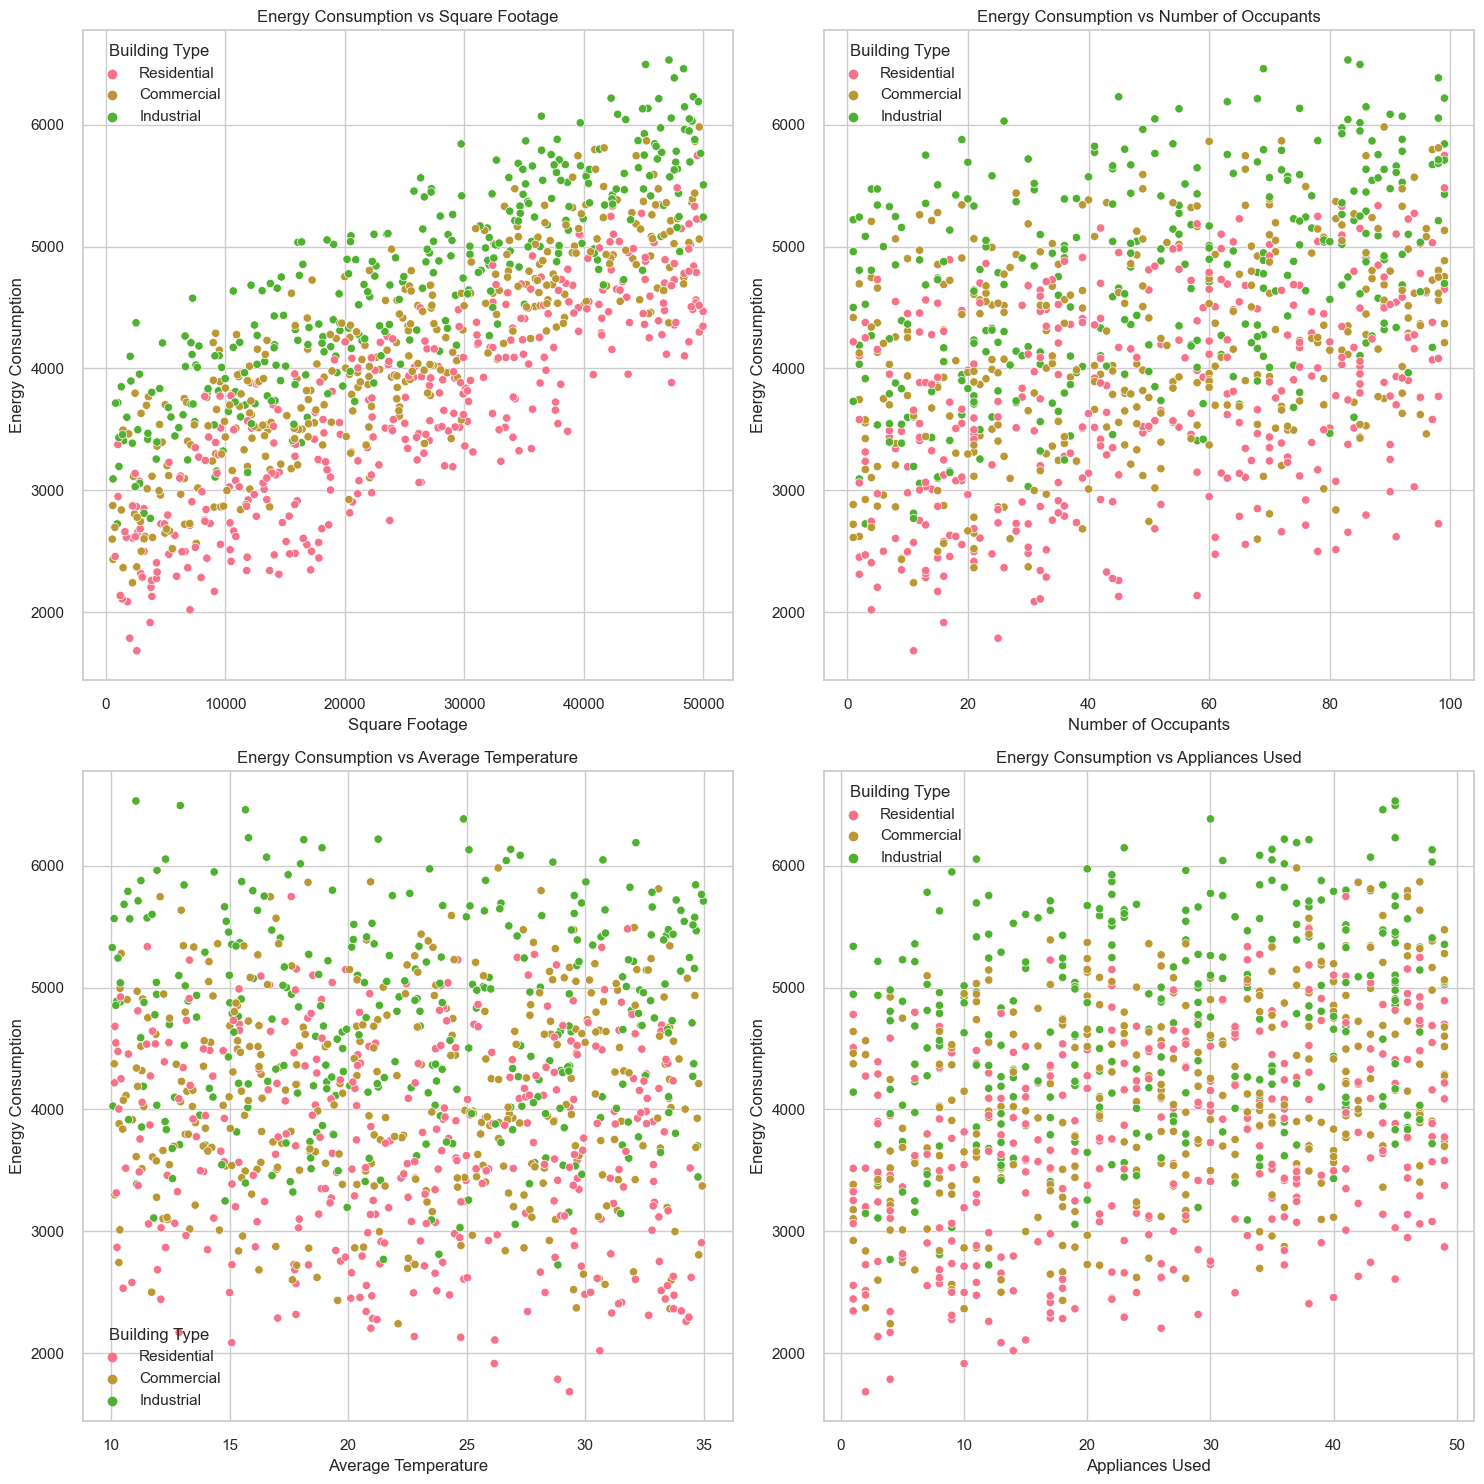

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.scatterplot(data=train_df, x='Square Footage', y='Energy Consumption', 
                hue='Building Type', ax=axes[0,0])
axes[0,0].set_title('Energy Consumption vs Square Footage')

sns.scatterplot(data=train_df, x='Number of Occupants', y='Energy Consumption', 
                hue='Building Type', ax=axes[0,1])
axes[0,1].set_title('Energy Consumption vs Number of Occupants')

sns.scatterplot(data=train_df, x='Average Temperature', y='Energy Consumption', 
                hue='Building Type', ax=axes[1,0])
axes[1,0].set_title('Energy Consumption vs Average Temperature')

sns.scatterplot(data=train_df, x='Appliances Used', y='Energy Consumption', 
                hue='Building Type', ax=axes[1,1])
axes[1,1].set_title('Energy Consumption vs Appliances Used')

plt.tight_layout()
plt.show()

## Key Findings

### 1. Data Quality
The dataset is clean and consistent, providing a solid foundation for analysis.

### 2. Building Types
Industrial buildings consume the most energy, while residential buildings are the most predictable. Each type needs tailored energy strategies.

### 3. Size Matters
Square footage strongly predicts energy use, suggesting optimization based on building size.

### 4. Occupancy Insights
Energy use rises with occupancy, especially in commercial buildings. Weekend and weekday differences are minimal.

### 5. Temperature Effects
Energy consumption varies with temperature but differently for each building type, highlighting the need for targeted solutions.

### 6. Appliances
Industrial buildings are more energy-efficient per appliance, revealing opportunities for efficiency improvements.

### 7. Predictive Modeling
Square footage and building type are key factors for accurate energy predictions. Simple and multivariate models can work well.

### 8. Recommendations
Focus on building type and size for energy strategies, enhance appliance efficiency, and explore occupancy-based systems for better control.

### 9. Next Steps
Dig deeper into seasonal trends, temperature-occupancy interactions, and peak usage patterns to refine energy management further.
